# Machine learning Adult income data end to end pipeline

# Import libraries' 

In [30]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [31]:
# Ignore warnings
warnings.filterwarnings("ignore")

In [32]:
# Set Seaborn plot size
sns.set(rc={"figure.figsize": (15, 6)})

In [33]:
# Set Pandas option to display all columns
pd.set_option("display.max_columns", None)

# Import income data sets

In [34]:
data =pd.read_csv(r"C:\Users\Laptop On Rent 078\Ravi_ML project\Notebook\Data\adult.csv")

In [35]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Check Data shape

In [36]:
data.shape

(48842, 15)

# check columns name 

In [37]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Check Data types

In [38]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

# check Datasets Info

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Check Missing or Null values in datasets

In [40]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Check Duplicate values in data set

In [41]:
data.duplicated().sum()

52

# Remove Duplicates values 

In [42]:
data.drop_duplicates(inplace=True)

# Describe data sets

In [43]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#  Seprate catogerical data & Numerical features

In [44]:
# Select categorical features (columns with object type)
categorical_features = data.select_dtypes(include="object").columns

# Select numerical features (columns with non-object dtypes)
numerical_features = data.select_dtypes(exclude="object").columns

# Categorical_features

In [45]:
categorical_features

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

# Numerical_features

In [46]:
numerical_features

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

# Check classification and workclass 

In [47]:
data['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

## Now we are useing loop for multiple columns 

In [48]:
## Featching the unique values from categorical data

for i in categorical_features:
    print(i,data[i].unique())
    print()
    print("------------------------------------------Separate categorical Data-------------------------------------------------")
    print()

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

------------------------------------------Separate categorical Data-------------------------------------------------

education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

------------------------------------------Separate categorical Data-------------------------------------------------

marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

------------------------------------------Separate categorical Data-------------------------------------------------

occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Tran

## remove ? from datasets and replace "MODE"

In [49]:
## remove ? from datasets and replace "MODE"

data["workclass"] = data["workclass"].replace('?',"Private")
data["occupation"] = data["occupation"].replace('?',"Prof-specialty")
data["native-country"] = data["native-country"].replace('?',"United-States")


## Data Visualizations 

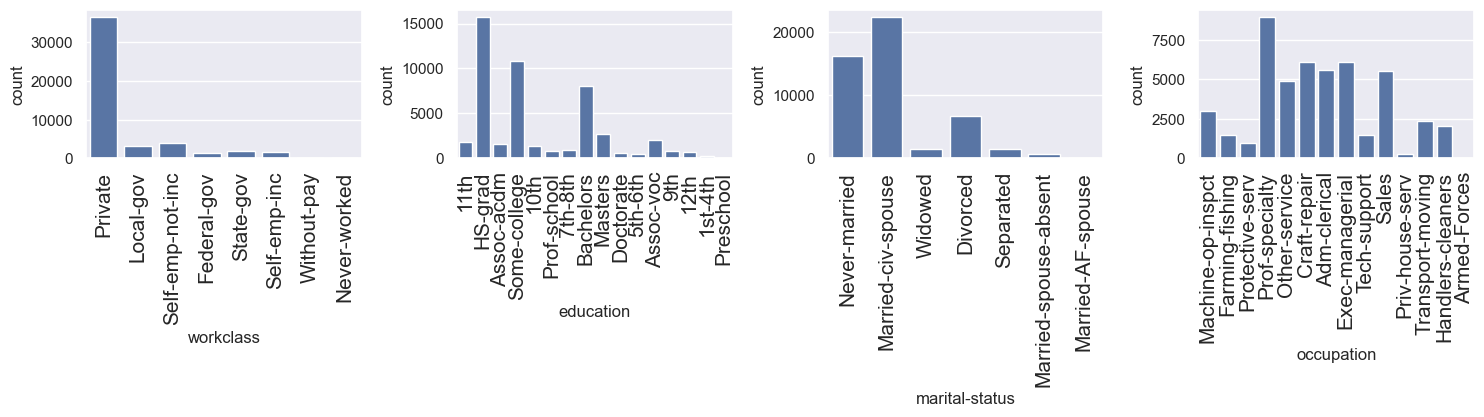

In [50]:
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize": (15, 6)})

columns1 =['workclass', 'education', 'marital-status', 'occupation']

for i in range(0,len(columns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[columns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

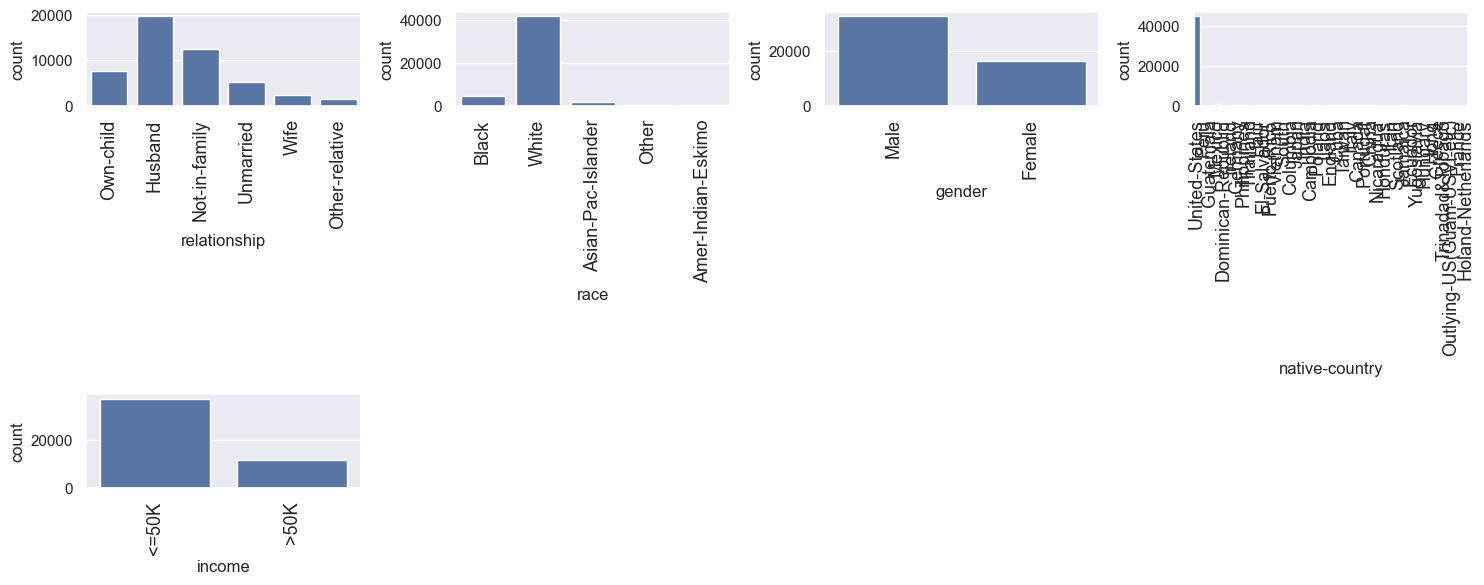

In [51]:
columns2 =['relationship', 'race', 'gender', 'native-country', 'income']

for i in range(0,len(columns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[columns2[i]])
    plt.xticks(size=13,rotation=90)
    plt.tight_layout()

## Data Visualization for Numerical Data 

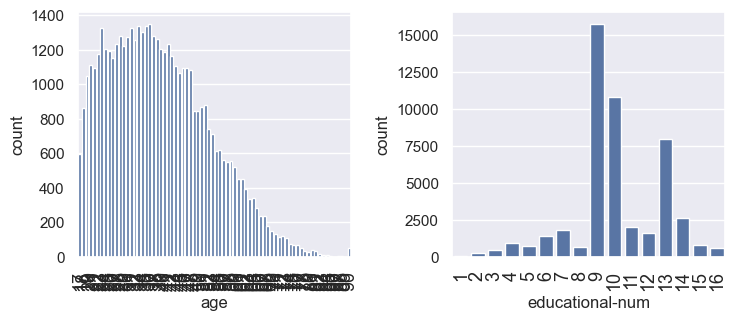

In [52]:
#plt.suptitle("Distrubution Graphs for numerical feature")

columns3=['age','educational-num']

for i in range(0,len(columns3)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[columns3[i]])
    plt.xticks(size=13,rotation=90)
    plt.tight_layout()

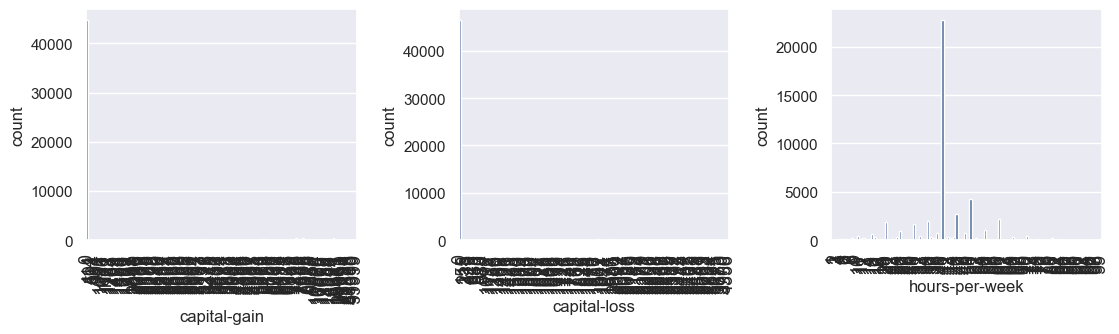

In [53]:
columns4=['capital-gain','capital-loss','hours-per-week']

for i in range(0,len(columns4)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[columns4[i]])
    plt.xticks(size=13,rotation=90)
    plt.tight_layout()

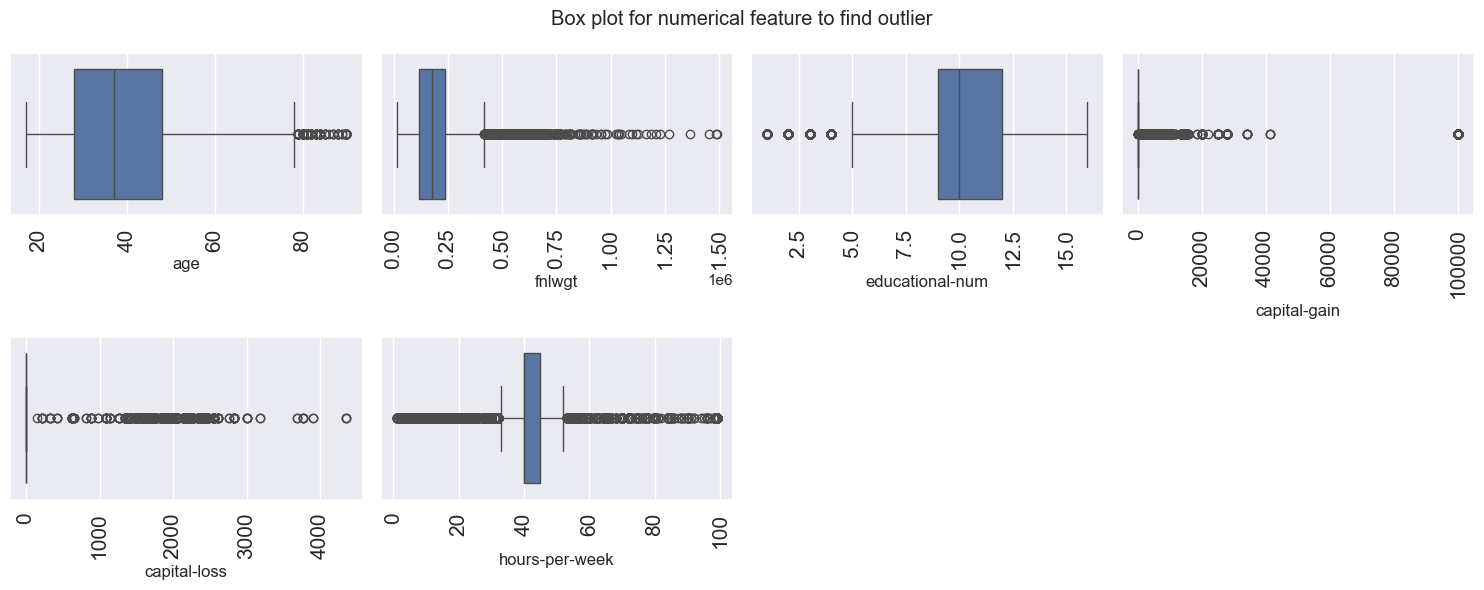

In [54]:
plt.suptitle("Box plot for numerical feature to find outlier")

for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [55]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)

# Crosstab with Trarget columns ""Income""

In [56]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


<Axes: xlabel='income'>

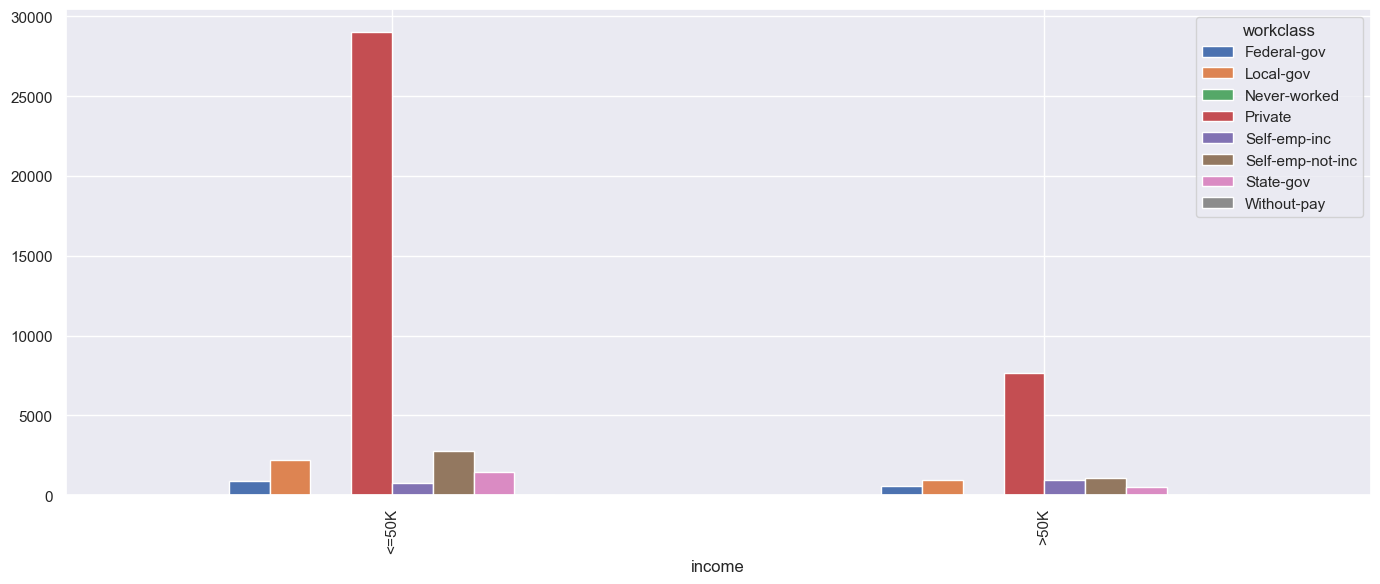

In [57]:
salary =pd.crosstab(data["income"],data["workclass"])
salary.plot(kind="bar")

<Axes: xlabel='income'>

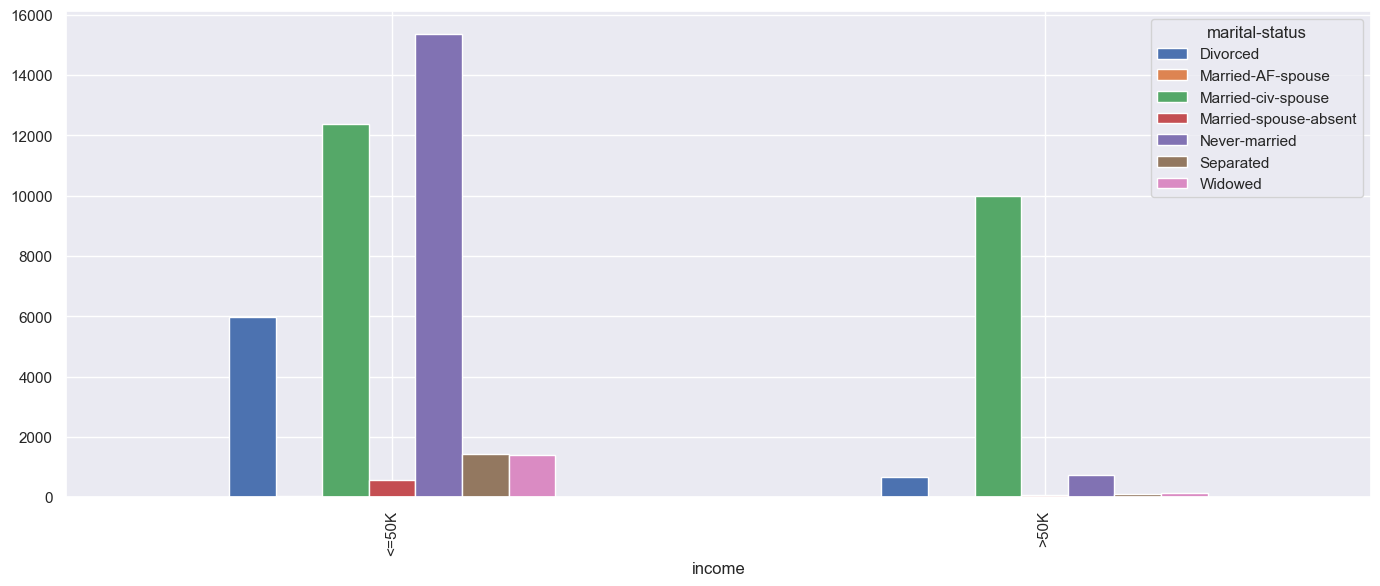

In [58]:
marital =pd.crosstab(data["income"],data["marital-status"])
marital.plot(kind="bar")

<Axes: xlabel='income'>

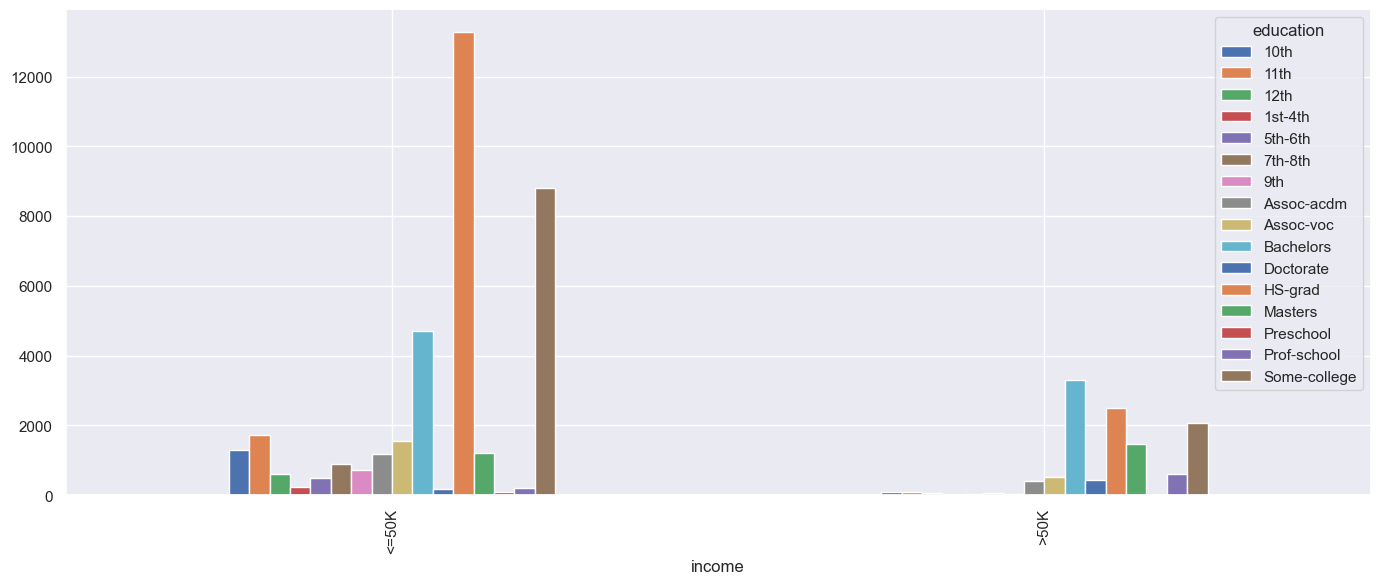

In [59]:
education = pd.crosstab(data["income"],data["education"])
education.plot(kind="bar")

<Axes: xlabel='income'>

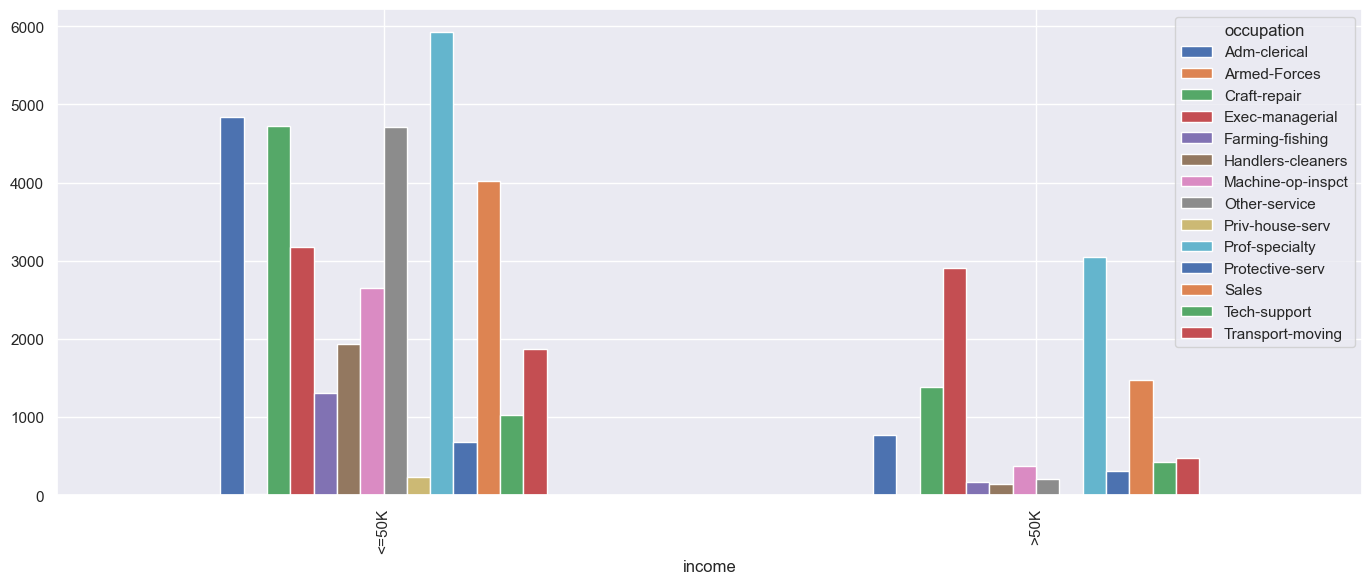

In [60]:
occupation = pd.crosstab(data["income"],data["occupation"])
occupation.plot(kind="bar")

<Axes: xlabel='income'>

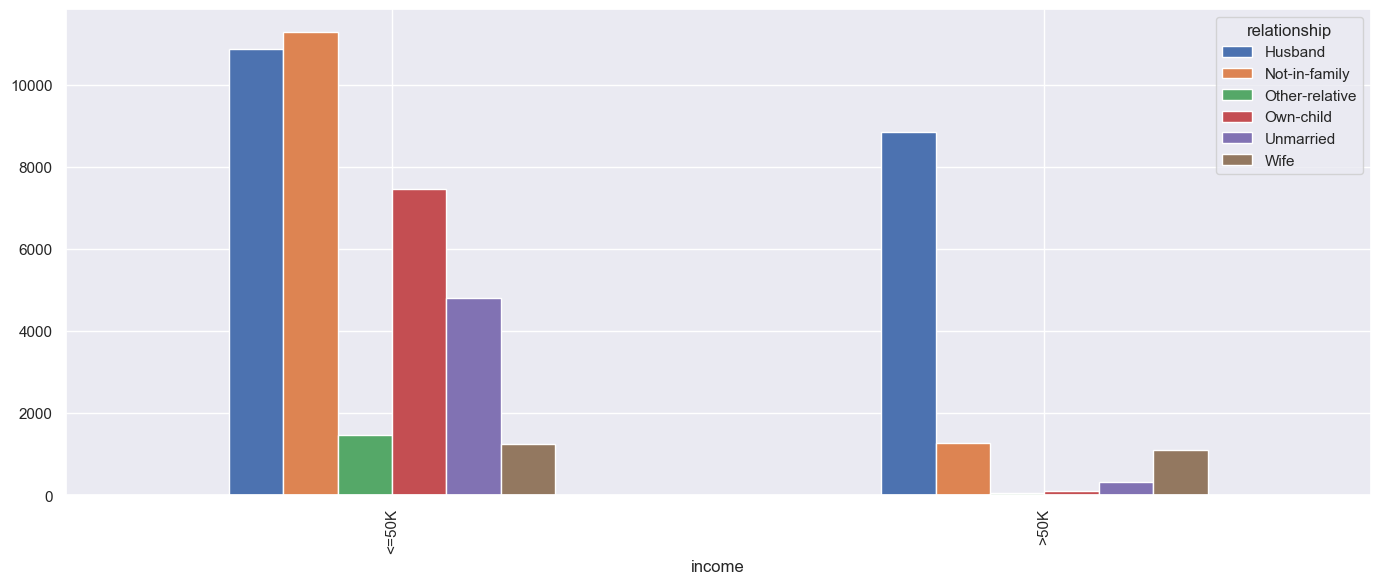

In [61]:
relationship =pd.crosstab(data["income"],data["relationship"])
relationship.plot(kind="bar")

<Axes: xlabel='income'>

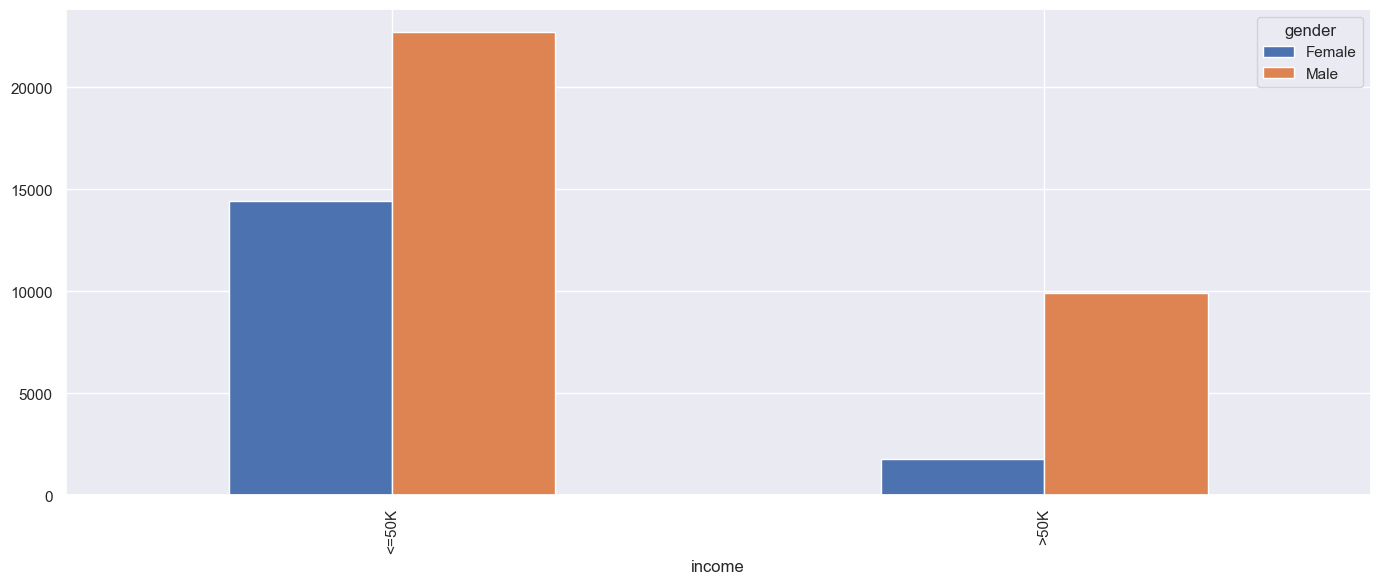

In [62]:
gender =pd.crosstab(data["income"],data["gender"])
gender.plot(kind="bar")

<Axes: xlabel='income'>

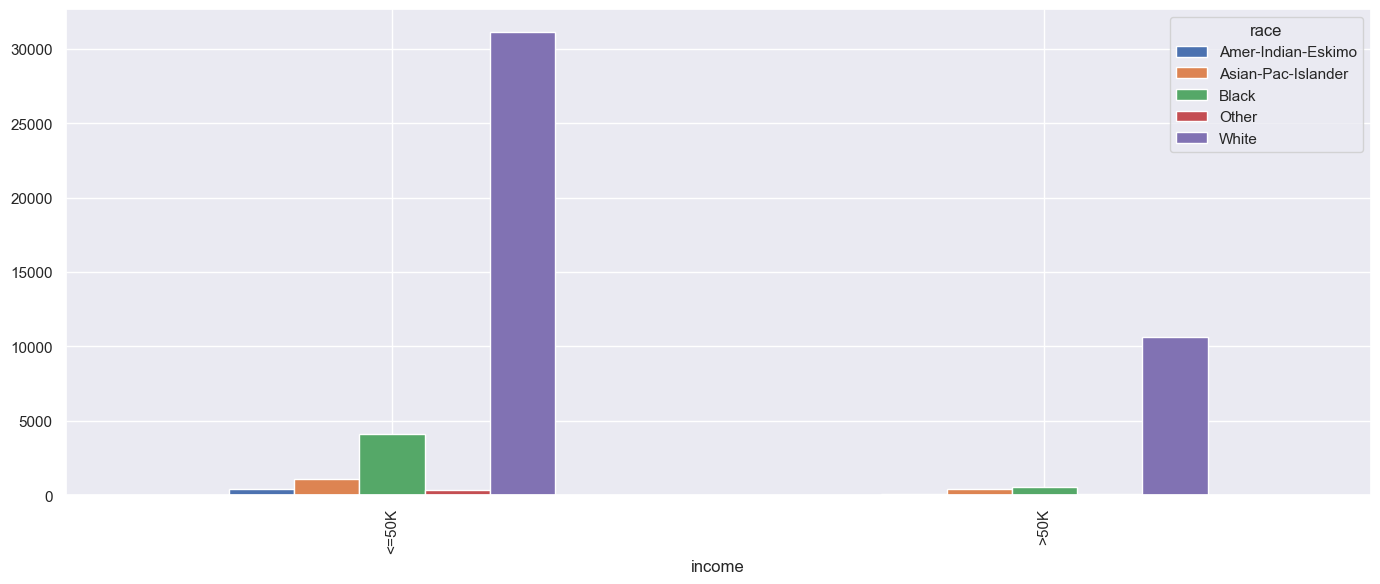

In [63]:
race =pd.crosstab(data["income"],data["race"])
race.plot(kind="bar")

<Axes: xlabel='income'>

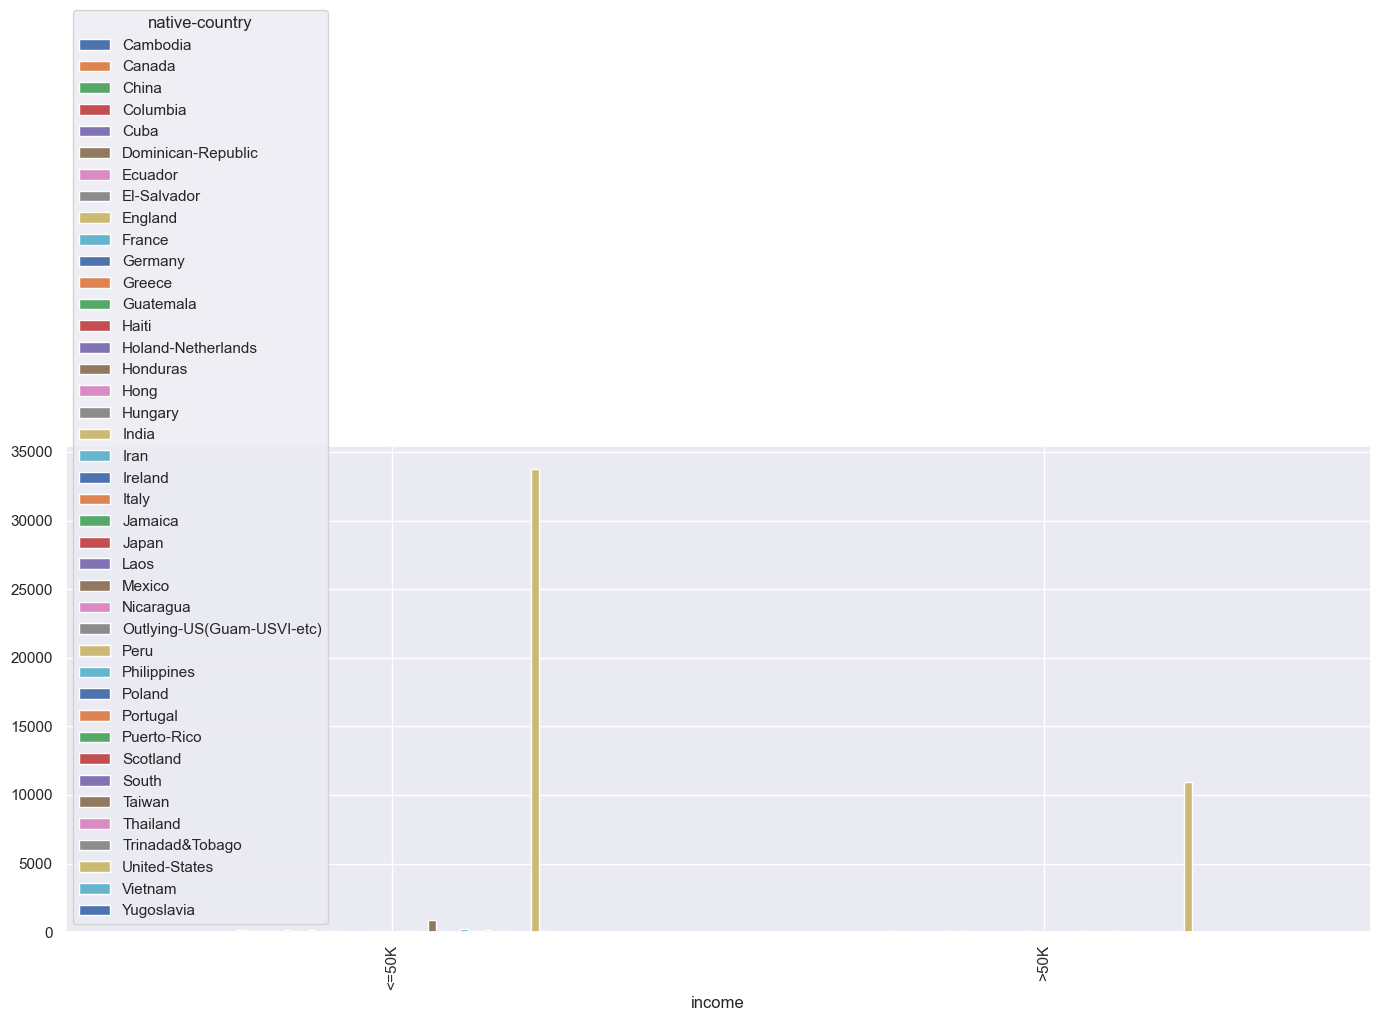

In [64]:
native_country = pd.crosstab(data["income"],data["native-country"])
native_country.plot(kind="bar")

# Convert categorical data into numeric format "" Label Encoder""

In [65]:
from sklearn.preprocessing import LabelEncoder 

# create label encoder object
le = LabelEncoder()

# Define categorical features 

categorical_features =['workclass','education','marital-status','occupation',
       'relationship','race','gender','native-country']

## Loop thoughts in the categorical features
for feature in categorical_features:
    le.fit(data[feature])
    data[feature]=le.transform(data[feature])

In [66]:
data["income"] = data["income"].map({'<=50K':0,'>50K':1})

## Correlation 

<Axes: >

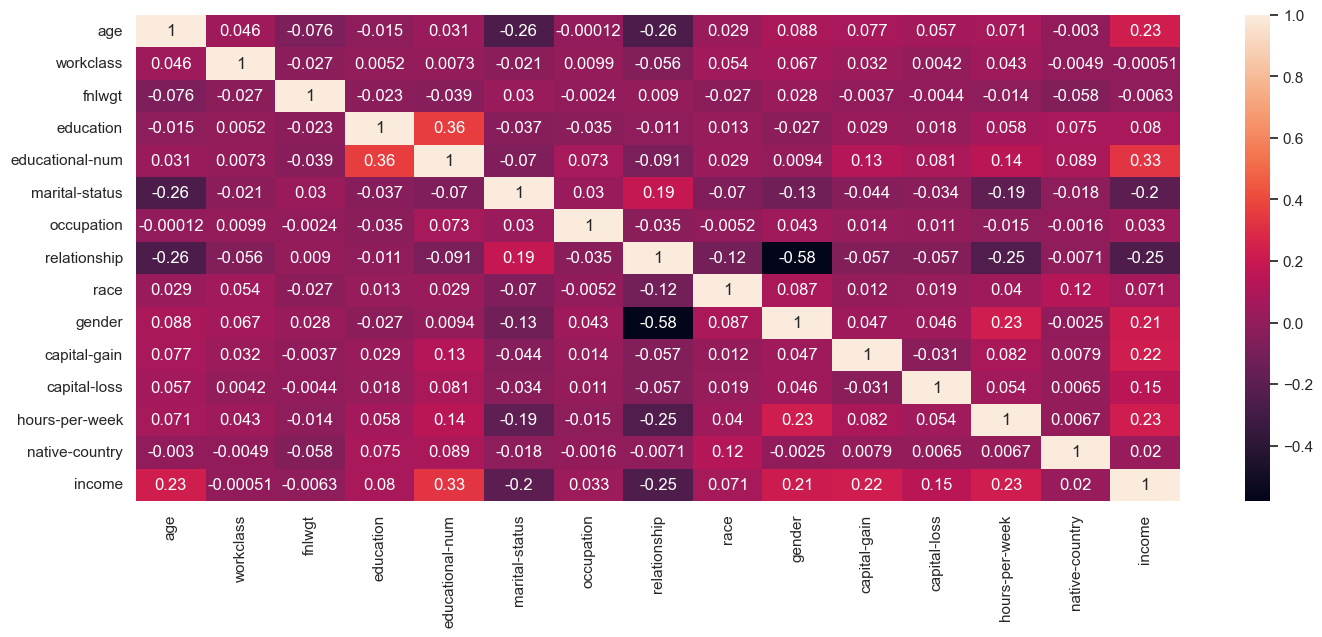

In [67]:
sns.heatmap(data.corr(),annot=True)

# Droping unwanted columns

In [68]:
data.drop(['fnlwgt','education'],axis=1,inplace=True)

In [69]:
data.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,7,4,6,3,2,1,0,0,40,38,0
1,38,3,9,2,4,0,4,1,0,0,50,38,0
2,28,1,12,2,10,0,4,1,0,0,40,38,1
3,44,3,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,10,4,9,3,4,0,0,0,30,38,0


In [70]:
data.to_csv("cleandata.csv",index=False)

# Model training

In [71]:
data.shape

(48790, 13)

# Seprate data into dependent and independent data

In [72]:
x = data.drop("income",axis=1)

y = data['income']

In [73]:
categorical_features=x.select_dtypes(include="object").columns 
numerical_features=x.select_dtypes(exclude="object").columns 

print(categorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country'],
      dtype='object')


## Pipline,StandardScaler,SimpleImputer,Pipeline,ColumnTransformer 

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
## Pipline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 

In [75]:
num_pipeline =Pipeline(
    steps =[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
) #to standardize data value into standard format

cato_pipeline  = Pipeline(
    steps =[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
) #to standardize data value into standard format

## apply transform to particular columns
preprocessor = ColumnTransformer([
    ("num_pipeline",num_pipeline,numerical_features )
]) 


# Spliting a data into train and test split

In [76]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.20,random_state=42)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39032, 12)
(9758, 12)
(39032,)
(9758,)


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

## Predict performance matrix Test and predict 

In [79]:
def performance_metrices(test,predict):
    confusionmatrix = print(f"CONFUSION_METRIX :{confusion_matrix(test,predict)}")
    
    precision = print(f"PRECISIONS_SCORE:{precision_score(test,predict)}")
    
    recall = print(f"RECALL_SCORE:{recall_score(test,predict)}")
    
    f1score =print(f"F1_SCORE:{f1_score(test,predict)}")
    
    accuracyscore= print(f"ACCURACY_SCORE:{accuracy_score(test,predict)}")
    
    return confusionmatrix,precision,recall,f1score,accuracyscore 


# use Hyperparemeter Tuning

## Logistic Regression for classification 

In [80]:
lr =LogisticRegression()

In [81]:
pram={
    
    "class_weight":["balanced"],
    "penalty":['l1','l2'],
    "C":[0.001,0.01,0.1,1,10,100],
    "solver":["liblinear","saga"]
}

In [82]:
grid =GridSearchCV(estimator= lr,param_grid= pram,cv=5,n_jobs =-1,verbose=3)

In [83]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [84]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [85]:
grid.score(X_train,y_train)

0.7795398647263784

In [86]:
y_pred = grid.predict(X_test)

In [87]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [88]:
accuracy_score(y_test,y_pred)

0.7832547653207624

# Decision Tree Classifier

In [89]:
dr = DecisionTreeClassifier()

In [90]:
param_grid={
    "class_weight":["balanced"],
    "criterion":['gini','entropy','log_loss'],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [91]:
grid_search =GridSearchCV(estimator=dr,param_grid=param_grid,cv=5,scoring="accuracy")

In [92]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [93]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'best'}

In [94]:
grid_search.score(X_train,y_train)

0.7559438409510145

In [95]:
y_parad = grid_search.predict(X_test)
y_parad

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [96]:
accuracy_score(y_test,y_parad)

0.7578397212543554

In [97]:
print(classification_report(y_test,y_parad))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      7440
           1       0.49      0.88      0.63      2318

    accuracy                           0.76      9758
   macro avg       0.72      0.80      0.73      9758
weighted avg       0.84      0.76      0.78      9758



## Random forest classifier

In [98]:
rf = RandomForestClassifier()

In [99]:
param_grid ={
    "class_weight":['balanced'],
    "n_estimators":[20,50,30],
    "max_depth":[10,8,5],
    "min_samples_split":[2,5,10],
}

In [100]:
grid_search =GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")

In [101]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [102]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 30}

In [103]:
grid_search.score(X_train,y_train)

0.8229657716745234

In [104]:
grid_search.score(X_test,y_test)

0.8166632506661201

In [105]:
y_parad=grid_search.predict(X_test)
y_parad

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [106]:
print(classification_report(y_test,y_parad))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7440
           1       0.58      0.87      0.69      2318

    accuracy                           0.82      9758
   macro avg       0.76      0.84      0.78      9758
weighted avg       0.86      0.82      0.83      9758



# KNeighborsClassifier

In [107]:
kn = KNeighborsClassifier()

In [108]:
param_grid = {
    
    "n_neighbors":[5,6,7,8,9], 
    "weights":["uniform"],
    "algorithm":["auto"],
    "leaf_size":[30,20,40,50],
    "metric":["minkowski"],
    "metric_params":[None], 
    "n_jobs":[None],
    'p':[2]
}

In [109]:
grid_search =GridSearchCV(estimator=kn,param_grid=param_grid,cv=5,scoring="accuracy")

In [110]:
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [30, 20, 40, 50],
                         'metric': ['minkowski'], 'metric_params': [None],
                         'n_jobs': [None], 'n_neighbors': [5, 6, 7, 8, 9],
                         'p': [2], 'weights': ['uniform']},
             scoring='accuracy')

In [111]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [30, 20, 40, 50],
                         'metric': ['minkowski'], 'metric_params': [None],
                         'n_jobs': [None], 'n_neighbors': [5, 6, 7, 8, 9],
                         'p': [2], 'weights': ['uniform']},
             scoring='accuracy')

In [112]:
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}

In [113]:
grid_search.score(X_train,y_train)

0.8792016806722689

In [114]:
grid_search.score(X_test,y_test)

0.8558106169296987

In [115]:
y_parad= grid_search.predict(X_test)
y_parad

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [116]:
print(classification_report(y_test,y_parad))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7440
           1       0.76      0.58      0.66      2318

    accuracy                           0.86      9758
   macro avg       0.82      0.76      0.78      9758
weighted avg       0.85      0.86      0.85      9758



In [117]:
#!pip install catboost

## Cat Boost Regressor

In [118]:
from catboost import CatBoostClassifier

In [119]:
cb = CatBoostClassifier(verbose=False)

In [120]:
param_grid ={
    "depth":[4,5,6,7,8,9, 10],
    "learning_rate":[0.01,0.02,0.03,0.04],
    "iterations":[10, 20,30,40,50,60,70,80,90, 100],
    "verbose":[False],
    "l2_leaf_reg":[1, 3, 5, 7, 9]
}

In [121]:
grid_search= GridSearchCV(estimator=cb,param_grid=param_grid,cv=5,scoring="accuracy")

In [122]:
grid_search

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001D19C638760>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'l2_leaf_reg': [1, 3, 5, 7, 9],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'verbose': [False]},
             scoring='accuracy')

In [123]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001D19C638760>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'l2_leaf_reg': [1, 3, 5, 7, 9],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'verbose': [False]},
             scoring='accuracy')

In [124]:
grid_search.best_params_

{'depth': 10,
 'iterations': 100,
 'l2_leaf_reg': 1,
 'learning_rate': 0.04,
 'verbose': False}

In [125]:
grid_search.score(X_train,y_train)

0.8653156384505022

In [126]:
grid_search.score(X_test,y_test)

0.8622668579626973

In [127]:
y_pred=grid_search.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [128]:
accuracy_score(y_pred,y_test)

0.8622668579626973

## Ending Learning 